# Análisis de Archivo de Audio con la libreria "Librosa"

**Objetivo:** Este notebook carga un archivo de audio ( En este caso un `.wav`), y utilizando la biblioteca `librosa` extraemos información básica, como igual visualizamos la forma de onda del audio y principalmente el objetivo es mostrar su espectrograma.



Montamos Google Drive para poder acceder al archivo de audio almacenado allí. Si ejecutas esto localmente, omite esta celda y ajusta la ruta del archivo en la celda de configuración.

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display, Audio

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Configuración de nuestra ruta

Definimos la ruta al archivo de audio y establecemos parámetros a nuestro gusto para las gráficas.

In [2]:
# Ruta a nueestro archivo de audio
# En este caso es en nuestro Google Drive.
audio_path = '/content/drive/My Drive/Audios/audiobird.wav'

# Configuración de nuestras gráficas
def set_default(figsize=(10, 10), dpi=100):
    """Define el estilo y tamaño por defecto para las gráficas de Matplotlib."""
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')         # Color de fondo de los ejes
    plt.rc('figure', facecolor='k')      # Color de fondo de la figura
    plt.rc('figure', figsize=figsize, dpi=dpi) # Tamaño y resolución
    plt.rc('axes', grid=True)
    plt.rc('grid', color='lightgrey', alpha=0.5) # Estilo de la rejilla

# Aplicamos la configuración con un tamaño adecuado para las visualizaciones, a nuestro gusto
set_default(figsize=(16, 8))

print("Configuración de gráficas ya aplicada.")
print(f"Ruta del audio : {audio_path}")

Configuración de gráficas ya aplicada.
Ruta del audio : /content/drive/My Drive/Audios/audiobird.wav


### Cargar el Archivo de Audio

Utilizamos `librosa.load()` para cargar el archivo. `sr=None` nos asegura que se utilice la frecuencia de muestreo original del archivo. Para después obtener la señal de audio como un array NumPy (`y`) y su frecuencia de muestreo (`sampling_rate`). En este caso se obtuvo el audio de: https://soundcloud.com/golem-audio

In [3]:
try:
    y, sampling_rate = librosa.load(audio_path, sr=None)
    print(f"Audio cargado exitosamente.")
    print(f" - Frecuencia de muestreo: {sampling_rate} Hz")
    print(f" - Número de muestras: {y.size}")
    print(f" - Duración: {y.size / sampling_rate:.2f} segundos")
except Exception as e:
    print(f"Error al cargar el archivo de audio: {e}")
    raise

Audio cargado exitosamente.
 - Frecuencia de muestreo: 22050 Hz
 - Número de muestras: 1356075
 - Duración: 61.50 segundos


### Reproducir el Audio

En este caso añadimos un reproductor del archivo de audio

In [4]:
print("Reproductor de audio:")
display(Audio(data=y, rate=sampling_rate))

Reproductor de audio:


### Preparar Datos para Graficar la Forma de Onda

Calculamos la duración total (`T`), el intervalo de tiempo entre muestras (`dt`) y creamos un vector de tiempo (`t`) que corresponde a cada muestra de la señal `y`.

In [5]:
# Duración total en segundos
T = y.size / sampling_rate
# Intervalo de tiempo entre muestras
dt = 1 / sampling_rate
# Vector de tiempo (desde 0 hasta T, con pasos de dt)
# Usamos np.linspace para asegurarnos de que se incluya el último punto T
t = np.linspace(0, T, num=y.size)

# Mostramos la información calculada, anteriormente para tener una mejor visualización
print(f'Duración total (T): {T:.3f}s')
print(f'Intervalo de tiempo (dt): {dt * 1e3:.3f} ms')
print(f'Vector de tiempo `t` creado con {t.size} puntos.')

Duración total (T): 61.500s
Intervalo de tiempo (dt): 0.045 ms
Vector de tiempo `t` creado con 1356075 puntos.


### Visualizar la Forma de Onda

Graficamos la amplitud de la señal de audio (`y`) en función del tiempo (`t`). Esto principalmente nos muestra cómo varía la presión sonora a lo largo del tiempo, que al final lo podemos ver como variaciones de voltaje del micrófono.

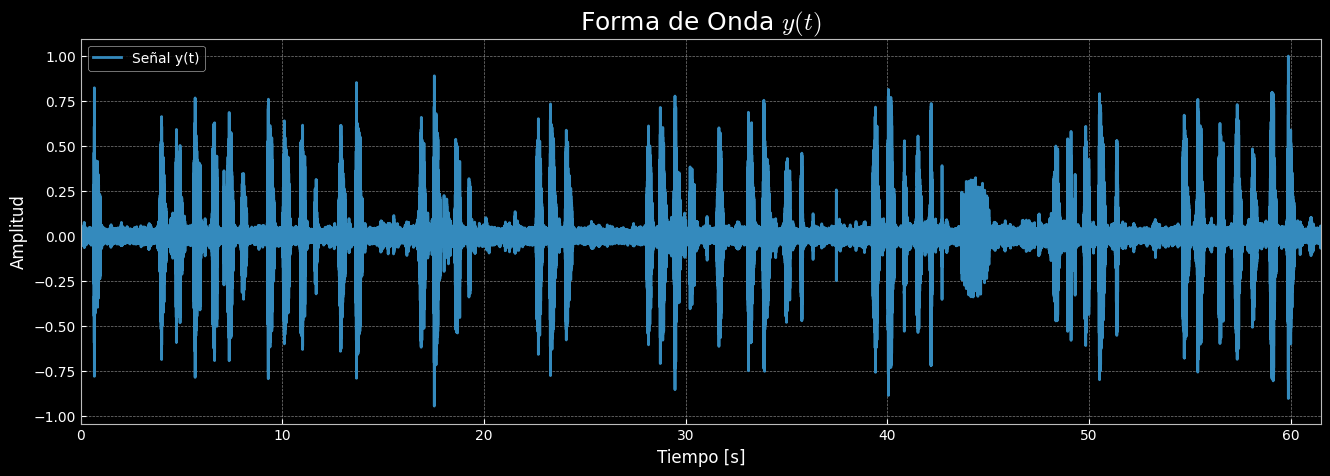

In [6]:
plt.figure(figsize=(16, 5))
plt.plot(t, y, label='Señal y(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title(r'Forma de Onda $y(t)$', size=18)
plt.xlim([0, T])
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

### Calcular el Espectrograma

Calculamos la Transformada de Fourier de Corto Plazo (STFT) usando `librosa.stft()`. Esto nos ayuda a descomponer la señal en ventanas de tiempo y así calcular la frecuencia presente en cada ventana. Después, convertimos las magnitudes de la STFT a decibelios (dB) usando `librosa.amplitude_to_db()`, lo cual nos ayuda a mejorar la visualización.

In [7]:
# Calculamos la STFT
X = librosa.stft(y)

# Convertimos la magnitud a decibelios (dB)
# usamos ref=np.max para que 0 dB sea el valor máximo de la señal
X_dB = librosa.amplitude_to_db(np.abs(X), ref=np.max)

print(f"STFT calculada. Forma de la matriz STFT (frecuencia x tiempo): {X.shape}")
print(f"Espectrograma en dB calculado. Forma: {X_dB.shape}")

STFT calculada. Forma de la matriz STFT (frecuencia x tiempo): (1025, 2649)
Espectrograma en dB calculado. Forma: (1025, 2649)


### Visualizar el Espectrograma

Utilizamos `librosa.display.specshow()` para mostrar el espectrograma (`X_dB`). El eje X representa el tiempo, el eje Y representa la frecuencia, y el color según sea más fuerte o más claro representa la intensidad (en dB) de cada frecuencia para cada instante de tiempo.

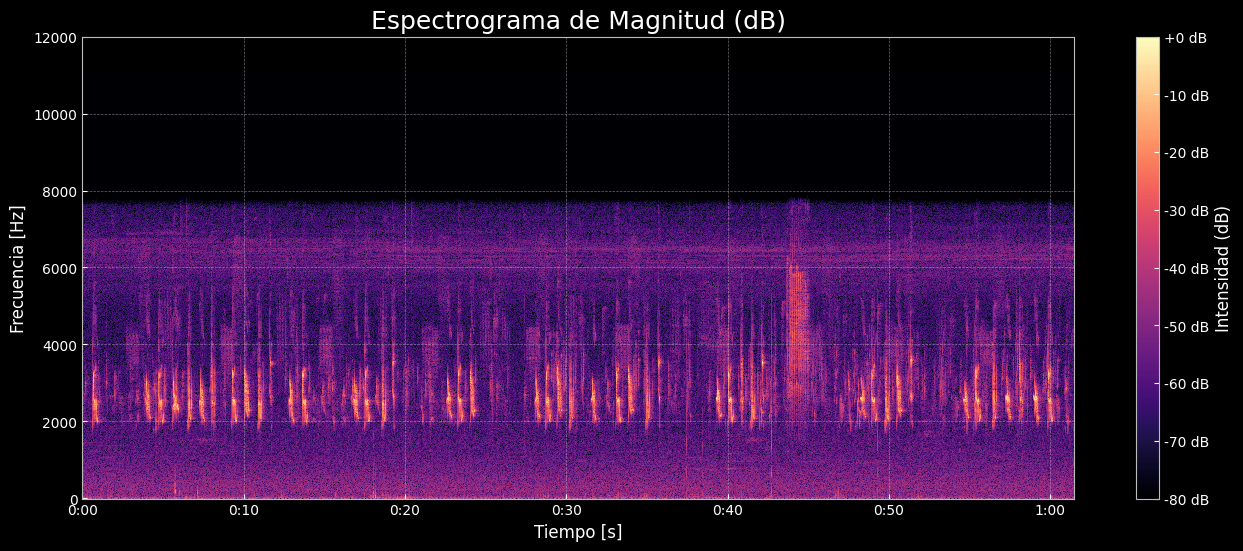

In [8]:
plt.figure(figsize=(16, 6))
librosa.display.specshow(X_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.ylim(top=12000) # Limitamos la visualización a frecuencias de hasta 12kHz
plt.colorbar(format='%+2.0f dB', label='Intensidad (dB)') # Añadimos una etiqueta a la barra de color
plt.title('Espectrograma de Magnitud (dB)', size=18)

plt.show()

### Visualización Combinada: Forma de Onda y Espectrograma

Finalmente mostramos la forma de onda y el espectrograma juntos. Esto nos facilita la correlación visual entre las dos características de la señal; los picos de amplitud y sus características en dB (cambios en las frecuencias). Aquí utilizamos `librosa.display.waveshow` para la forma de onda.

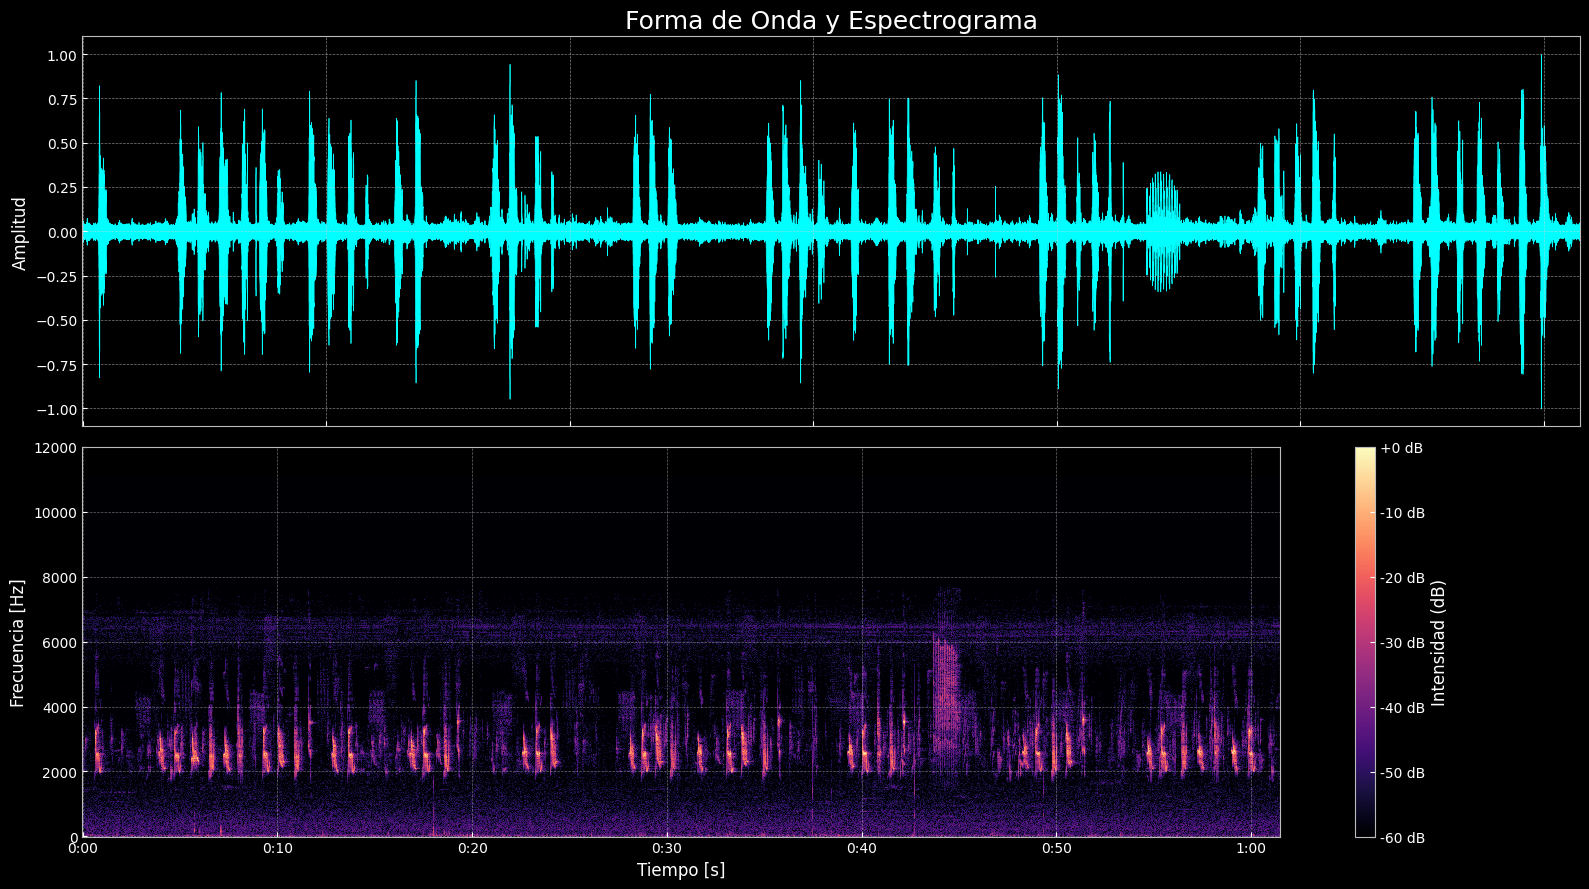

In [9]:

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16, 9))

# Grafica de la forma de onda
img_wave = librosa.display.waveshow(y, sr=sampling_rate, ax=ax[0], color='cyan')
ax[0].set_ylabel('Amplitud')
ax[0].set_title('Forma de Onda y Espectrograma', size=18)
ax[0].label_outer()
ax[0].grid(True, alpha=0.6)

# Grafica del espectrograma
img_spec = librosa.display.specshow(X_dB, sr=sampling_rate, x_axis='time', y_axis='hz', ax=ax[1], vmin=-60, vmax=0)
ax[1].set_xlabel('Tiempo [s]')
ax[1].set_ylabel('Frecuencia [Hz]')
ax[1].set_ylim(top=12000)


fig.colorbar(img_spec, ax=ax[1], format='%+2.0f dB', label='Intensidad (dB)')

plt.tight_layout()
plt.show()